In [1]:
import numpy as np
import re
import os
from os import walk
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/stb/Documents/Synthetic Data Generation/Step3


In [3]:
# mypath=cwd+r'\tvae_trn01' #input model file name?
mypath='/Users/stb/Documents/Synthetic Data Generation/Training Trials/tvae/2019/20 modes eps 5e-4/tvae_PID9263'

In [4]:
filenames = (next(walk(mypath), (None, None, []))[2])

In [5]:
filenames = [x for x in filenames if (('.txt' in x) & ('optuna_trials_summary.txt' not in x))]
# filenames = filenames.sort()
filenames.sort()
filenames

['summary_PID9263_20210902_065231_0.txt',
 'summary_PID9263_20210902_084405_1.txt',
 'summary_PID9263_20210902_104620_2.txt',
 'summary_PID9263_20210902_132859_3.txt',
 'summary_PID9263_20210902_141540_4.txt',
 'summary_PID9263_20210902_164345_5.txt',
 'summary_PID9263_20210902_190130_6.txt',
 'summary_PID9263_20210902_210023_7.txt',
 'summary_PID9263_20210902_234633_8.txt',
 'summary_PID9263_20210903_015600_9.txt',
 'summary_PID9263_20210903_043147_10.txt',
 'summary_PID9263_20210903_064746_11.txt',
 'summary_PID9263_20210903_090108_12.txt',
 'summary_PID9263_20210903_112848_13.txt',
 'summary_PID9263_20210903_134420_14.txt',
 'summary_PID9263_20210903_161140_15.txt',
 'summary_PID9263_20210903_171924_16.txt',
 'summary_PID9263_20210903_200325_17.txt',
 'summary_PID9263_20210903_221037_18.txt',
 'summary_PID9263_20210904_011938_19.txt',
 'summary_PID9263_20210904_012911_20.txt',
 'summary_PID9263_20210904_023959_21.txt',
 'summary_PID9263_20210904_024928_22.txt',
 'summary_PID9263_202

In [6]:
keepinglist=[] # keep only successful runs

In [7]:
for file in os.listdir(mypath):
    if file.endswith(".pkl"):
        keepinglist.append(file)

In [8]:
import re

keepinglist=list(map(lambda x: int(re.findall(r"^.+_([0-9]{1,2})_PID.+(.pkl)$", x)[0][0]), keepinglist))
keepinglist

[23, 12, 13, 9, 5]

In [9]:
filenames=[filenames[i] for i in keepinglist]
filenames

['summary_PID9263_20210904_025903_23.txt',
 'summary_PID9263_20210903_090108_12.txt',
 'summary_PID9263_20210903_112848_13.txt',
 'summary_PID9263_20210903_015600_9.txt',
 'summary_PID9263_20210902_164345_5.txt']

In [10]:
column_names = ["trial_name","loss_min","epoch_min","epoch_max"]
consolidating = pd.DataFrame(columns = column_names)

/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_16428/1991580342.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_info = data_info.drop([0], 1)
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_16428/1991580342.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_info = data_info.drop([0], 1)
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_16428/1991580342.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_info = data_info.drop([0], 1)
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_16428/1991580342.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_info = data_info.drop([0],

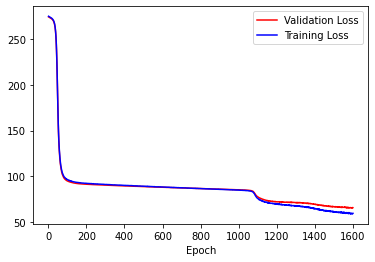

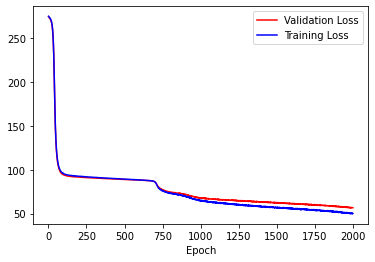

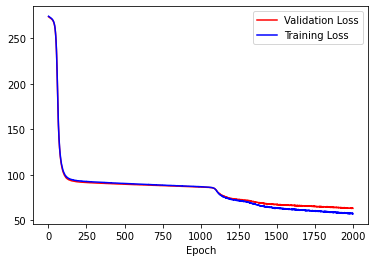

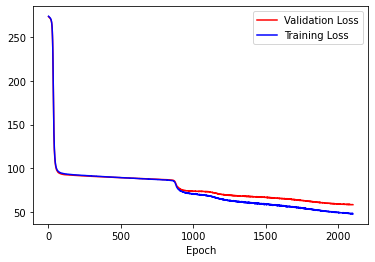

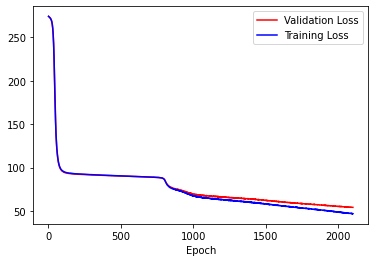

In [11]:

for i in filenames:
    file_path=mypath+"/"+i
    with open (file_path, "r") as myfile:
        data = myfile.readlines()
    data_info=pd.DataFrame(data[14:-1])
    data_info[['Epoch','Training_Loss','Validation_Loss','Loss 1(NLL)','Loss 2(KLD)']] = data_info[0].str.split(',',expand=True)
    data_info = data_info.loc[data_info.Validation_Loss.notnull(),]

    data_info['Epoch'] = data_info['Epoch'].apply(lambda x: int(x[23::]))
    data_info['Training_Loss'] = data_info['Training_Loss'].apply(lambda x: float(list((re.compile('-?\d+.\d+')).findall(x))[0]))
    data_info['Validation_Loss'] = data_info['Validation_Loss'].apply(lambda x: float(list((re.compile('\d+.\d+')).findall(x))[0]))
    data_info = data_info.drop([0], 1)
    ax = data_info.plot( 'Epoch' , 'Validation_Loss', color='r',label='Validation Loss')
    data_info.plot('Epoch' , 'Training_Loss', color='b',label='Training Loss', ax = ax)

    
    loss_min=min(data_info['Validation_Loss'])
    loss_range_max=(max(data_info['Validation_Loss'])-loss_min)*0.2+loss_min
    range_data=data_info[data_info['Validation_Loss']<=loss_range_max]
    epoch_min=min(range_data['Epoch'])  
    epoch_max=max(range_data['Epoch']) 
    row_val=[i,loss_min,epoch_min,epoch_max]
    df_length = len(consolidating)
    consolidating.loc[df_length] = row_val

In [12]:
consolidating

,trial_name,loss_min,epoch_min,epoch_max
0,summary_PID9263_20210904_025903_23.txt,65.465930,68,1600
1,summary_PID9263_20210903_090108_12.txt,56.490673,72,2000
2,summary_PID9263_20210903_112848_13.txt,62.848503,93,2000
3,summary_PID9263_20210903_015600_9.txt,58.117230,52,2100
4,summary_PID9263_20210902_164345_5.txt,54.238483,85,2100
